In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


import warnings

warnings.filterwarnings('ignore')

In [2]:
def show_face_and_eyes(faces,image,gray_image):
    
    cv2.destroyAllWindows()
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


    plt.figure()
    plt.imshow(face_img, cmap='gray')
    plt.show()

In [3]:
def get_cropped_img_if_2_eyes(image_path):
    
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_color

In [4]:
os.listdir('../data/player_images/lionel_messi/')

['l_7.jpg',
 'l_22.jfif',
 'l_11.jpg',
 'l_6.jpeg',
 'l_18.jpg',
 'l_16.jpg',
 'l_15.jfif',
 'l_23.jpg',
 'l_14.jpg',
 'l_21.jpg',
 'l_9.jfif',
 'l_19.jpg',
 'l_13.jpeg',
 'cropped',
 'l_12.jfif',
 'l_1.png',
 'l_4.jpg',
 'l_20.jfif']

In [24]:
messi_img_path = '../data/player_images/lionel_messi/l_1.png'
ronaldo_img_path = '../data/player_images/cristiano_ronaldo/c_7.png'
ronaldo_img_path_no_clear_face = '../data/player_images/cristiano_ronaldo/c_33.jpg'
messi = cv2.imread(messi_img_path)
ronaldo = cv2.imread(ronaldo_img_path)

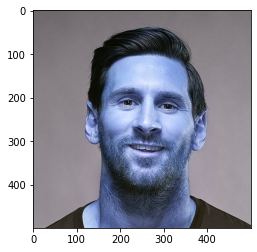

In [25]:
plt.imshow(messi)

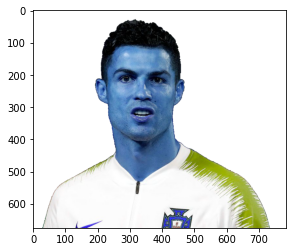

In [26]:
plt.imshow(ronaldo)

In [27]:
messi_gray = cv2.cvtColor(messi,cv2.COLOR_BGR2GRAY)
ronaldo_gray = cv2.cvtColor(ronaldo,cv2.COLOR_BGR2GRAY)

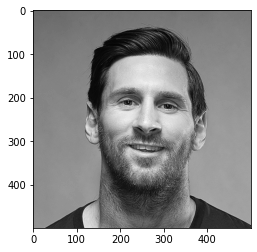

In [28]:
plt.imshow(messi_gray,cmap='gray')

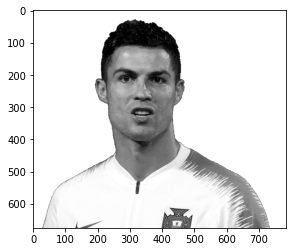

In [29]:
plt.imshow(ronaldo_gray,cmap='gray')

In [30]:
face_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

In [31]:
messi_face = face_cascade.detectMultiScale(messi_gray, 1.3, 5)
ronaldo_face = face_cascade.detectMultiScale(ronaldo_gray, 1.3, 5)

In [32]:
x_m,y_m,w_m,h_m = messi_face[0]
x_r,y_r,w_r,h_r = ronaldo_face[0]

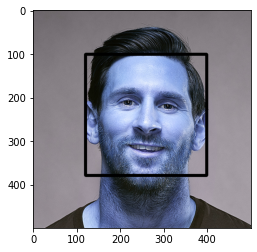

In [33]:
messi_face_img = cv2.rectangle(messi,(x_m,y_m),(x_m+w_m,y_m+h_m),(0,0,0),5)
plt.imshow(messi_face_img)

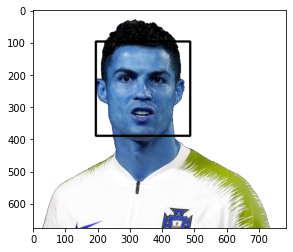

In [34]:
ronaldo_face_img = cv2.rectangle(ronaldo,(x_r,y_r),(x_r + w_r,y_r + h_r),(0,0,0),5)
plt.imshow(ronaldo_face_img)

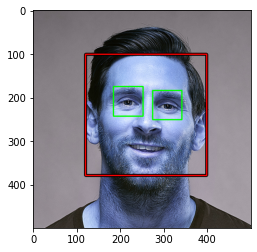

In [35]:
show_face_and_eyes(messi_face,messi,messi_gray)

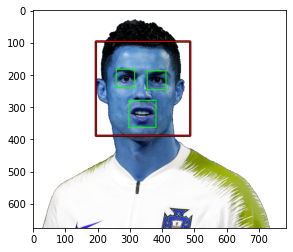

In [36]:
show_face_and_eyes(ronaldo_face,ronaldo,ronaldo_gray)

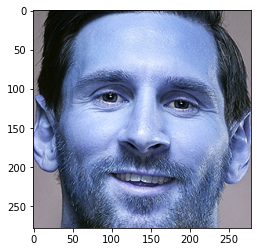

In [37]:
cropped_image = get_cropped_img_if_2_eyes(messi_img_path)
plt.imshow(cropped_image)

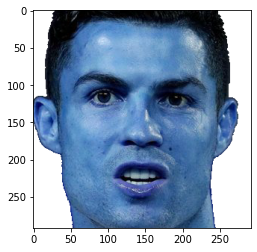

In [38]:
cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path)
plt.imshow(cropped_image)

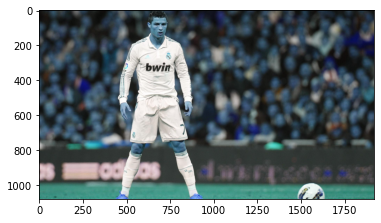

In [39]:
not_clear_image = cv2.imread(ronaldo_img_path_no_clear_face)
plt.imshow(not_clear_image)

In [40]:
cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path_no_clear_face)
cropped_image

In [41]:
cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path)
cropped_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [42]:
path = '../data/player_images/'
image_dirs = os.listdir('../data/player_images')

In [43]:
for img_dir in image_dirs:
    dir_path = path + img_dir + '/cropped'
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

In [52]:
for img_dir in image_dirs:
    
    dir_path = path + img_dir
    
    i = 0
    
    for file in os.listdir(dir_path):

        if file != 'cropped':
            
            try:
                cropped_image = get_cropped_img_if_2_eyes(dir_path + '/' + file)
                if cropped_image is not None:
                    i+=1
            except:
                print(file)

    print(f'Got {i} images for {img_dir}')

libpng warning: iCCP: known incorrect sRGB profile


Got 56 images for ronaldinho
Got 12 images for lionel_messi


libpng warning: iCCP: known incorrect sRGB profile


Got 21 images for patrick_vieira
Got 38 images for thierry_henry
Got 16 images for cristiano_ronaldo
